In [1]:
#importing_kaggle_account_for_getting_ASVspoof dataset
import json
import os
kaggle_credentials = {
    "username": "vimlendusharma",
    "key": "8f463164b487a9e3367fe1b4a8bb803a"
}
with open('kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#install_kaggle_API_client
!pip install -q kaggle

#test_kaggle_API
!kaggle datasets list

ref                                                                    title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset                    Customer Shopping (Latest Trends) Dataset        76KB  2024-11-23 15:26:12          13797        265  1.0              
hopesb/student-depression-dataset                                      Student Depression Dataset.                     454KB  2024-11-22 17:56:03          10535        141  1.0              
jeleeladekunlefijabi/ship-fuel-consumption-and-co2-emissions-analysis  Ship Fuel Consumption & CO2 Emissions Analysis   30KB  2024-12-15 13:36:56            556         24  1.0              
denkuznetz/taxi-price-prediction             

In [3]:
#Data_Preprocessing
#Audio_Conversion_and_Normalization
import os
import librosa
import soundfile as sf

def preprocess_audio(input_path, output_path):
    for file_name in os.listdir(input_path):
        if file_name.endswith('.wav'):
            y, sr = librosa.load(os.path.join(input_path, file_name), sr=16000, mono=True)
            y = librosa.util.normalize(y)
            sf.write(os.path.join(output_path, file_name), y, sr)

In [4]:
!ls /content/datasets

ls: cannot access '/content/datasets': No such file or directory


In [5]:
#directory_for_dataset
!mkdir -p datasets/asvspoof2019
%cd datasets/asvspoof2019

!kaggle datasets download -d awsaf49/asvpoof-2019-dataset

/content/datasets/asvspoof2019
Dataset URL: https://www.kaggle.com/datasets/awsaf49/asvpoof-2019-dataset
License(s): ODC Attribution License (ODC-By)
100% 23.6G/23.6G [05:06<00:00, 145MB/s]
100% 23.6G/23.6G [05:06<00:00, 82.5MB/s]


In [6]:
!ls /content/datasets/asvspoof2019

asvpoof-2019-dataset.zip


In [7]:
#unzip_the_dataset
import zipfile

# Unzip the downloaded dataset
with zipfile.ZipFile('asvpoof-2019-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


In [8]:
!ls /content/datasets

asvspoof2019


In [9]:
!ls /content/datasets/asvspoof2019

asvpoof-2019-dataset.zip		     LA		       README.txt
asvspoof2019_evaluation_plan.pdf	     LICENSE_text.txt
asvspoof2019_Interspeech2019_submission.pdf  PA


In [10]:
!ls /content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_train/flac

Streaming output truncated to the last 5000 lines.
LA_T_1030843.flac  LA_T_2829975.flac  LA_T_4597499.flac  LA_T_6426017.flac  LA_T_8184669.flac
LA_T_1031233.flac  LA_T_2830481.flac  LA_T_4597853.flac  LA_T_6426194.flac  LA_T_8184716.flac
LA_T_1031792.flac  LA_T_2830490.flac  LA_T_4597884.flac  LA_T_6426230.flac  LA_T_8184748.flac
LA_T_1032064.flac  LA_T_2830574.flac  LA_T_4598188.flac  LA_T_6426400.flac  LA_T_8185024.flac
LA_T_1032079.flac  LA_T_2831186.flac  LA_T_4599845.flac  LA_T_6426557.flac  LA_T_8185303.flac
LA_T_1032598.flac  LA_T_2831191.flac  LA_T_4600077.flac  LA_T_6427285.flac  LA_T_8185322.flac
LA_T_1033159.flac  LA_T_2831329.flac  LA_T_4600402.flac  LA_T_6427329.flac  LA_T_8185499.flac
LA_T_1033197.flac  LA_T_2831733.flac  LA_T_4600654.flac  LA_T_6427764.flac  LA_T_8185768.flac
LA_T_1033243.flac  LA_T_2832247.flac  LA_T_4601012.flac  LA_T_6429255.flac  LA_T_8186588.flac
LA_T_1033465.flac  LA_T_2832493.flac  LA_T_4601205.flac  LA_T_6429393.flac  LA_T_8186635.flac
LA_T_1033

In [11]:
input_path = '/content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_train/flac'

In [12]:
# Define the output path
output_path = '/content/preprocessed_audio'

# Create the directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
#output_path_to_google_drive
output_path = '/content/drive/MyDrive/preprocessed_audio'

# Create the directory if it doesn't exist
#os.makedirs(output_path, exist_ok=True)

In [15]:
import os
import librosa
import soundfile as sf

def preprocess_audio(input_path, output_path):

    # List all files in the input directory
    for file_name in os.listdir(input_path):
        if file_name.endswith('.flac') or file_name.endswith('.wav'):
            # Full path to the input file
            input_file = os.path.join(input_path, file_name)

            # Load the audio file
            y, sr = librosa.load(input_file, sr=16000, mono=True)

            # Normalize the audio
            y = librosa.util.normalize(y)

            # Full path to the output file (save as .wav)
            output_file = os.path.join(output_path, os.path.splitext(file_name)[0] + '.wav')

            # Save the preprocessed audio
            sf.write(output_file, y, sr)


In [16]:
input_path = '/content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_train/flac'
output_path = '/content/drive/MyDrive/preprocessed_audio'

# Create the directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

In [17]:
preprocess_audio(input_path, output_path)

In [18]:
#preprocess_the_development_set
input_path_dev = '/content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_dev/flac'
output_path_dev = '/content/preprocessed_audio'

# Create the directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

In [19]:
preprocess_audio(input_path_dev, output_path_dev)

In [20]:
eval_input_path = '/content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_eval/flac'
eval_output_path = '/content/preprocessed_audio_eval'
os.makedirs(eval_output_path, exist_ok=True)

In [21]:
preprocess_audio(eval_input_path, eval_output_path)

In [22]:
# List the preprocessed files in the output directory
!ls /content/drive/MyDrive/preprocessed_audio

Streaming output truncated to the last 5000 lines.
LA_T_1030843.wav  LA_T_2829975.wav  LA_T_4597499.wav  LA_T_6426017.wav	LA_T_8184669.wav
LA_T_1031233.wav  LA_T_2830481.wav  LA_T_4597853.wav  LA_T_6426194.wav	LA_T_8184716.wav
LA_T_1031792.wav  LA_T_2830490.wav  LA_T_4597884.wav  LA_T_6426230.wav	LA_T_8184748.wav
LA_T_1032064.wav  LA_T_2830574.wav  LA_T_4598188.wav  LA_T_6426400.wav	LA_T_8185024.wav
LA_T_1032079.wav  LA_T_2831186.wav  LA_T_4599845.wav  LA_T_6426557.wav	LA_T_8185303.wav
LA_T_1032598.wav  LA_T_2831191.wav  LA_T_4600077.wav  LA_T_6427285.wav	LA_T_8185322.wav
LA_T_1033159.wav  LA_T_2831329.wav  LA_T_4600402.wav  LA_T_6427329.wav	LA_T_8185499.wav
LA_T_1033197.wav  LA_T_2831733.wav  LA_T_4600654.wav  LA_T_6427764.wav	LA_T_8185768.wav
LA_T_1033243.wav  LA_T_2832247.wav  LA_T_4601012.wav  LA_T_6429255.wav	LA_T_8186588.wav
LA_T_1033465.wav  LA_T_2832493.wav  LA_T_4601205.wav  LA_T_6429393.wav	LA_T_8186635.wav
LA_T_1033664.wav  LA_T_2832760.wav  LA_T_4601779.wav  LA_T_6429525.wa

In [23]:
#Feature_Extraction
#Extract_MFCC_features_to_capture_the_timbral_aspects_of_audio
import numpy as np

def extract_mfcc(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

In [24]:
#Spectrogram_Generation
#Generate_spectrograms_to_visualize_frequency_content_over_time
import matplotlib.pyplot as plt

def generate_spectrogram(y, sr, output_file):
    plt.specgram(y, Fs=sr)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.savefig(output_file)
    plt.close()

In [25]:
import numpy as np
import librosa

def extract_mfcc(y, sr, n_mfcc=40):
    """
    Extract MFCC features and compute the mean over time frames.

    Parameters:
    - y: Audio time series.
    - sr: Sampling rate.
    - n_mfcc: Number of MFCCs to extract.

    Returns:
    - mfccs_mean: 1D array of mean MFCCs (shape: n_mfcc).
    """
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean


In [26]:
import os
import librosa
import numpy as np

def get_label(file_name, label_dict):
    # Remove file extension to match keys in label_dict
    file_id = os.path.splitext(file_name)[0]
    return label_dict.get(file_id, -1)  # Returns -1 if label not found

def extract_features_and_labels(input_dir, label_dict, n_mfcc=40):
    features = []
    labels = []
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(input_dir, file_name)
            y, sr = librosa.load(file_path, sr=16000)
            mfccs_mean = extract_mfcc(y, sr, n_mfcc)
            features.append(mfccs_mean)
            label = get_label(file_name, label_dict)
            labels.append(label)
    return np.array(features), np.array(labels)


In [27]:
#loading_labels_from_protocol_file
def load_labels(protocol_file_path):
    label_dict = {}
    with open(protocol_file_path, 'r') as f:
        for line in f:
            tokens = line.strip().split()
            file_name = tokens[1]
            label = tokens[-1]
            label_dict[file_name] = 0 if label == 'bonafide' else 1
    return label_dict


protocol_file = '/content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
label_dict = load_labels(protocol_file)


In [28]:
input_dir = '/content/drive/MyDrive/preprocessed_audio'
features, labels = extract_features_and_labels(input_dir, label_dict, n_mfcc=40)


In [29]:
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

Features shape: (25380, 40)
Labels shape: (25380,)


In [30]:
#model_training
#Feature_scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [31]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)


In [32]:
#training_the_model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
#identifying_important_features
importances = model.feature_importances_

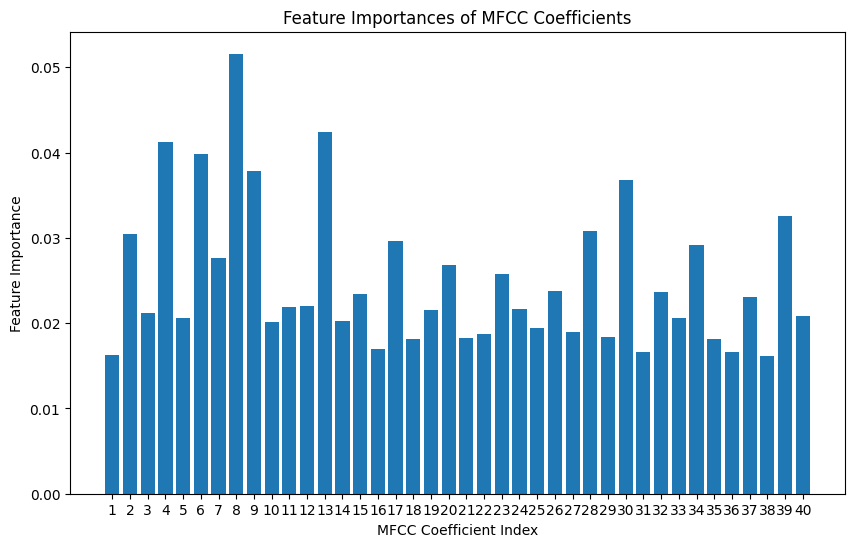

In [34]:
#Visualising_feature_importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(importances)+1), importances)
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of MFCC Coefficients')
plt.xticks(range(1, len(importances)+1))
plt.show()


In [35]:
!pip install shap

In [36]:
import shap
print(f"SHAP version: {shap.__version__}")


SHAP version: 0.46.0


In [37]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [38]:
print("Shape of X_test:", X_test.shape)
print("Type of shap_values:", type(shap_values))

Shape of X_test: (5076, 40)
Type of shap_values: <class 'numpy.ndarray'>


In [41]:
print("Shape of X_test:", X_test.shape)
print("Shape of features:", features.shape)
print("Shape of features_scaled:", features_scaled.shape)

# Check if shap_values is a list
if isinstance(shap_values, list):
    print("shap_values is a list with length:", len(shap_values))
    print("Shape of shap_values[0]:", shap_values[0].shape)
    print("Shape of shap_values[1]:", shap_values[1].shape)
else:
    print("Shape of shap_values:", shap_values.shape)

# Shape of shap_values_difference
#print("Shape of shap_values_difference:", shap_values_difference.shape)


Shape of X_test: (5076, 40)
Shape of features: (25380, 40)
Shape of features_scaled: (25380, 40)
Shape of shap_values: (5076, 40, 2)


In [44]:
shap_values_class0 = shap_values[:, :, 0]

In [45]:
shap_values_class1 = shap_values[:, :, 1]  # Shape: (5076, 40)

In [46]:
#Compute_SHAP_value_difference
shap_values_difference = shap_values_class1 - shap_values_class0  # Shape: (5076, 40)

In [47]:
shap_values_difference = shap_values_class1 - shap_values_class0  # Shape: (5076, 40)


In [48]:
print("Shape of shap_values_class1:", shap_values_class1.shape)
print("Shape of shap_values_class0:", shap_values_class0.shape)
print("Shape of shap_values_difference:", shap_values_difference.shape)
print("Shape of X_test:", X_test.shape)


Shape of shap_values_class1: (5076, 40)
Shape of shap_values_class0: (5076, 40)
Shape of shap_values_difference: (5076, 40)
Shape of X_test: (5076, 40)


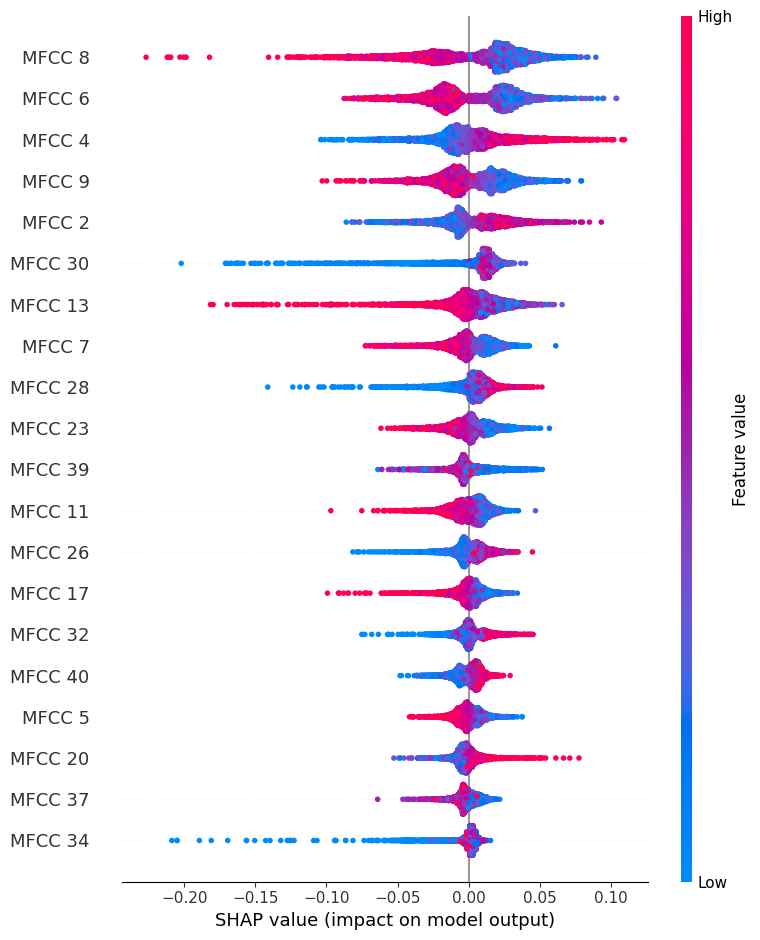

In [49]:
import shap

# Define feature names
feature_names = [f'MFCC {i+1}' for i in range(X_test.shape[1])]

# Plot summary plot for class 1
shap.summary_plot(shap_values_class1, X_test, feature_names=feature_names)


In [50]:
#Load_Labels
def load_labels(protocol_file_path):
    label_dict = {}
    with open(protocol_file_path, 'r') as f:
        for line in f:
            tokens = line.strip().split()
            file_name = tokens[1]
            label = tokens[-1]
            # bonafide -> 0, spoofed/fake -> 1
            label_dict[file_name] = 0 if label == 'bonafide' else 1
    return label_dict

In [51]:
train_protocol = '/content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
dev_protocol = '/content/datasets/asvspoof2019/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt'

In [52]:
train_label_dict = load_labels(train_protocol)
dev_label_dict = load_labels(dev_protocol)

In [53]:
#Feature_Extraction

In [54]:
import numpy as np

def extract_mfcc(y, sr, n_mfcc=40):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

def extract_features_and_labels(input_dir, label_dict, n_mfcc=40):
    features = []
    labels = []
    file_list = []
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(input_dir, file_name)
            y, sr = librosa.load(file_path, sr=16000)
            mfccs_mean = extract_mfcc(y, sr, n_mfcc)
            features.append(mfccs_mean)
            # Get label from dict
            # Remove extension to match protocol file ID
            file_id = os.path.splitext(file_name)[0]
            label = label_dict.get(file_id, -1)
            labels.append(label)
            file_list.append(file_name)
    return np.array(features), np.array(labels), file_list

In [ ]:
train_features, train_labels, train_files = extract_features_and_labels(output_path, train_label_dict)
dev_features, dev_labels, dev_files = extract_features_and_labels(output_path_dev, dev_label_dict)

In [ ]:
# Filter_out_any_entries_with_label -1_(not found)

In [ ]:
mask_train = train_labels != -1
train_features = train_features[mask_train]
train_labels = train_labels[mask_train]

In [ ]:
mask_dev = dev_labels != -1
dev_features = dev_features[mask_dev]
dev_labels = dev_labels[mask_dev]

In [ ]:
#Exploratory_Data_Analysis_(EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution_of_classes_in_training_set
fig, ax = plt.subplots()
sns.countplot(x=train_labels, ax=ax)
ax.set_title('Class Distribution in Training Set')
ax.set_xticklabels(['Bonafide (0)', 'Fake (1)'])
plt.show()

In [ ]:
#Visualize_few_MFCC_features
random_idx = np.random.choice(len(train_features))
sample_mfcc = train_features[random_idx]
plt.figure(figsize=(10,4))
plt.bar(range(len(sample_mfcc)), sample_mfcc)
plt.title("MFCC Feature Example")
plt.xlabel("MFCC Coefficients")
plt.ylabel("Mean Value")
plt.show()

In [80]:
#Check_if_dataset_is_imbalanced
bonafide_count = np.sum(train_labels == 0)
fake_count = np.sum(train_labels == 1)
print("Bonafide count:", bonafide_count, "Fake count:", fake_count)


Bonafide count: 2580 Fake count: 22800


In [ ]:
#Data_Augmentation_for_training_Data

In [ ]:
def time_stretch(y, rate=1.1):
    return librosa.effects.time_stretch(y, rate)

def pitch_shift(y, sr, n_steps=2):
    return librosa.effects.pitch_shift(y, sr, n_steps)

In [65]:
#Feature_Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
dev_features_scaled = scaler.transform(dev_features)

In [67]:
#Re-extract_MFCC_in_a_way_that_we_don't_average_over_time
def extract_mfcc_2d(y, sr, n_mfcc=40, max_len=200):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Pad or truncate to fixed length max_len for uniform input shape
    if mfccs.shape[1] < max_len:
        mfccs = np.pad(mfccs, ((0,0),(0, max_len - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :max_len]
    return mfccs

In [68]:
def extract_features_2d(input_dir, label_dict, n_mfcc=40, max_len=200):
    X, Y = [], []
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_id = os.path.splitext(file_name)[0]
            label = label_dict.get(file_id, -1)
            if label == -1:
                continue
            file_path = os.path.join(input_dir, file_name)
            y, sr = librosa.load(file_path, sr=16000)
            mfccs = extract_mfcc_2d(y, sr, n_mfcc, max_len)
            X.append(mfccs)
            Y.append(label)
    return np.array(X), np.array(Y)

In [69]:
train_X_2d, train_Y_2d = extract_features_2d(output_path, train_label_dict)
dev_X_2d, dev_Y_2d = extract_features_2d(output_path_dev, dev_label_dict)

In [70]:
train_X_2d = train_X_2d[..., np.newaxis]
dev_X_2d = dev_X_2d[..., np.newaxis]

In [71]:
#Build CNN+RNN Model

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_crnn_model(n_mfcc=40, max_len=200, num_classes=2):
    input_shape = (n_mfcc, max_len, 1)

    model = models.Sequential()
    # CNN layers
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))
    shape = model.output_shape
    model.add(layers.Reshape((shape[1]*shape[3], shape[2])))
    model.add(layers.Permute((2,1)))

    #RNN_layer
    model.add(layers.GRU(64, return_sequences=True))
    model.add(layers.GRU(64))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [73]:
model = build_crnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 198, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 198, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 97, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 48, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 48, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 512, 48)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ permute (Permute)                    │ (None, 48, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 48, 64)              │         110,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,266 (606.51 KB)

 Trainable params: 155,074 (605.76 KB)

 Non-trainable params: 192 (768.00 B)

In [74]:
#Training_the_Model

In [75]:
from sklearn.model_selection import train_test_split
X_val, X_test, Y_val, Y_test = train_test_split(dev_X_2d, dev_Y_2d, test_size=0.5, random_state=42, stratify=dev_Y_2d)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
]


history = model.fit(
    train_X_2d, train_Y_2d,
    validation_data=(X_val, Y_val),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9236 - loss: 0.1905 - val_accuracy: 0.9651 - val_loss: 0.1189
Epoch 2/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9851 - loss: 0.0405 - val_accuracy: 0.9608 - val_loss: 0.1359
Epoch 3/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9705 - val_loss: 0.0964
Epoch 4/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9754 - val_loss: 0.0905
Epoch 5/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9941 - loss: 0.0165 - val_accuracy: 0.9753 - val_loss: 0.1044
Epoch 6/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9711 - val_loss: 0.1180
Epoch 7/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9962 - loss: 0.0104 - val_accuracy: 0.9776 - val_loss: 0.0831
Epoch 8/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9973 - loss: 0.0097 - 

In [76]:
#Evaluation

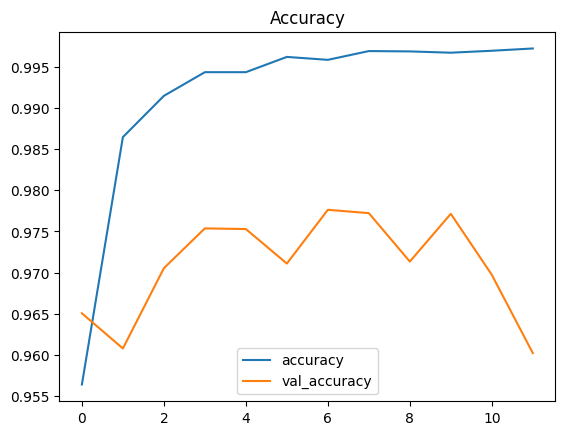

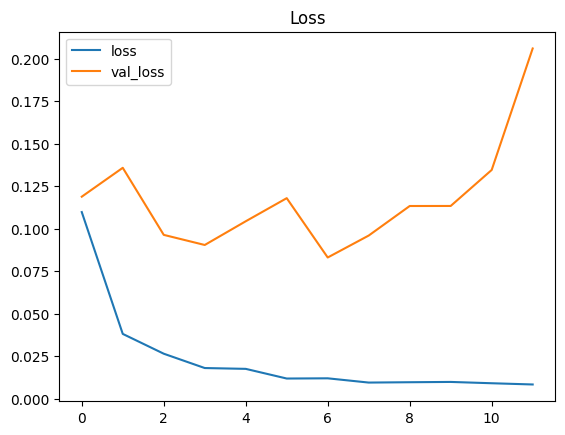

389/389 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9795 - loss: 0.0805
Test Accuracy: 0.9784253835678101


In [77]:
import pandas as pd

#Plot_training_history
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(title='Accuracy')
pd.DataFrame(history.history)[['loss','val_loss']].plot(title='Loss')
plt.show()

#Evaluate_on_test_set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)


In [78]:
# Detailed metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(Y_test, Y_pred_classes, target_names=['Bonafide','Fake']))

cm = confusion_matrix(Y_test, Y_pred_classes)
print("Confusion Matrix:")
print(cm)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, Y_pred[:,1])
print("ROC-AUC:", roc_auc)


389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

    Bonafide       0.90      0.88      0.89      1274
        Fake       0.99      0.99      0.99     11148

    accuracy                           0.98     12422
   macro avg       0.94      0.94      0.94     12422
weighted avg       0.98      0.98      0.98     12422

Confusion Matrix:
[[ 1127   147]
 [  121 11027]]
ROC-AUC: 0.9915938698904254


In [79]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Model already saved best weights as best_model.h5 by checkpoint

# Convert final model to h5 format (if not already)
model.save('fake_audio_detection_model.h5')

In [81]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Model already saved best weights as best_model.h5 by checkpoint

# Convert final model to h5 format (if not already)
model.save('fake_audio_detection_model.keras')

In [ ]:
import os

print("Saved models in:", os.listdir(checkpoint_dir))


In [82]:
from google.colab import files

# Download the model
files.download('best_model.keras')

# If you saved a scaler as well:
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
files.download('fake_audio_detection_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>